# Load stack_tup

In [1]:
%matplotlib inline
from __future__ import print_function,absolute_import,division,unicode_literals
import numpy as np
import glob,os,sys,copy,imp 
from scipy import stats as scistats
import matplotlib as mpl
mpl.rcParams['font.family']='stixgeneral'
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import QTable,Table
from astropy.io import ascii,fits
from astropy import units as u
from astropy import constants as const
from astropy.coordinates import SkyCoord
from linetools.spectralline import AbsLine
import linetools.utils as ltu
from xastropy.igm.abs_sys import abssys_utils as abssys
from xastropy import spec as xpsec
from xastropy.plotting import utils as xputils
from xastropy.xutils import xdebug as xdb
from xastropy.obs import radec as xor
from xastropy.atomic import ionization as xai
from xastropy.xutils import fits as xxf
sys.path.append(os.path.abspath("../../../../py"))
from enigma.qpq import utils as qpqutils
from enigma.qpq import spec as qpqs
from enigma.qpq import stacks as qpqk
sys.path.append(os.path.abspath("../Bootstrap/py"))
import qpq9_boot as qpq9b
sys.path.append(os.path.abspath("./py"))
import qpq9_stacks as qpq9k

/Users/lwymarie/anaconda/lib/python2.7/site-packages/astroquery/sdss/__init__.py:28: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
No spectrum found for BOSSJ0034-1049 and wvobs=7938.22 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using spec-4223-55451-0508.fits.gz for SDSSJ0042+0032
S/N in rest frame: 9.9883765209 1 / Angstrom


/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:249: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


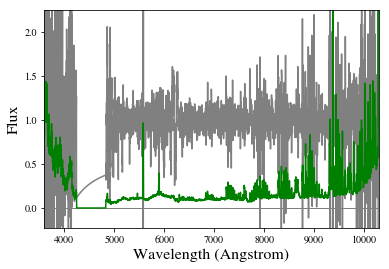

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0047+3101 and wvobs=8306.88 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using spec-6203-56266-0300.fits.gz for SDSSJ0047+1447
S/N in rest frame: 21.5280279412 1 / Angstrom


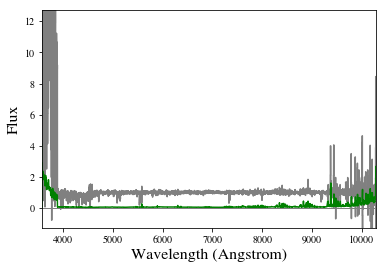

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for BOSSJ0057-0001 and wvobs=8839.49 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
SDSSJ0103-0002 does not survive atmosphere cut
No spectrum found for SDSSJ0103-0002 and wvobs=7691.73 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0122+3017 and wvobs=7683.04 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Use

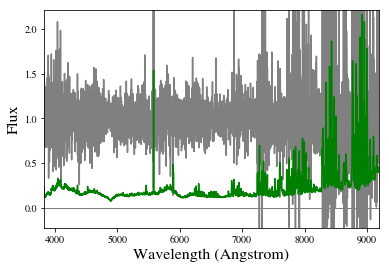

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0214-0052 and wvobs=7830.34 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0224-0046 and wvobs=7538.72 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0225-0114 and wvobs=7348.55 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1

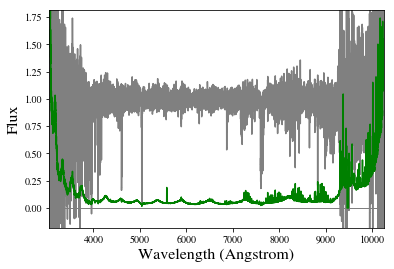

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.00022 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/GNIRS_redux//./SDSSJ040954.21-041137.0.fits
SDSSJ0409-0411 does not survive atmosphere cut
SDSSJ0409-0411 does not survive atmosphere cut
No spectrum found for SDSSJ0409-0411 and wvobs=7596.71 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0727+3929 and wvobs=8347.92 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading i

/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:974: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__rtruediv__(other)


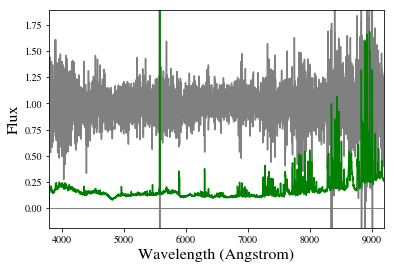

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ080048.74+354231.3.fits
No spectrum found for APOJ0800+3542 and wvobs=8340.18 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-3687-55269-0420.fits.gz for SDSSJ0805+4724
S/N in rest frame: 8.72653571889 1 / Angstrom


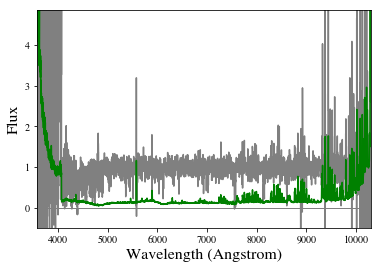

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0809+5009 and wvobs=7402.41 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0809+4539 and wvobs=8498.81 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-4463-55868-0778.fits.gz for SDSSJ0812+2620
S/N in rest frame: 11.1973957096 1 / Angstrom


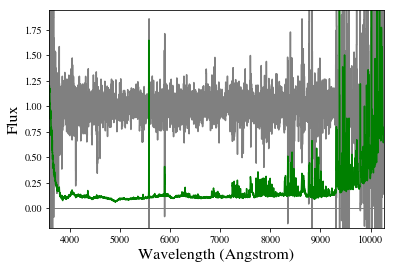

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
No spectrum found for BOSSJ0814+3250 and wvobs=8876.78 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
SDSSJ0818+1232 does not survive atmosphere cut
SDSSJ0818+1232 does not survive atmosphere cut
No spectrum found for SDSSJ0818+1232 and wvobs=7559.03 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ08

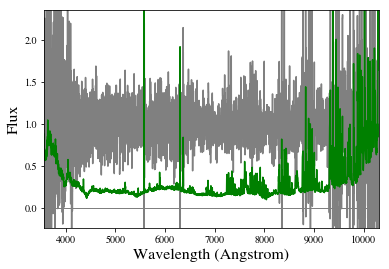

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7301-56746-0872.fits.gz for SDSSJ0824+5313
S/N in rest frame: 11.2555440152 1 / Angstrom


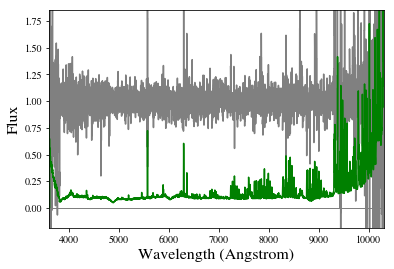

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ082844.87+454518.2.fits for SDSSJ0828+4545
S/N in rest frame: 11.4593104838 1 / Angstrom


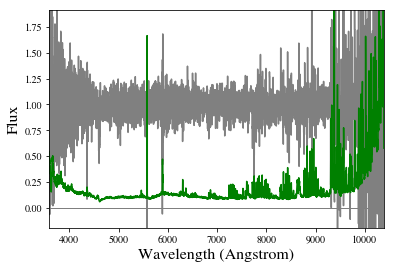

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7277-56748-0713.fits.gz for SDSSJ0830+5452
S/N in rest frame: 9.26371790678 1 / Angstrom


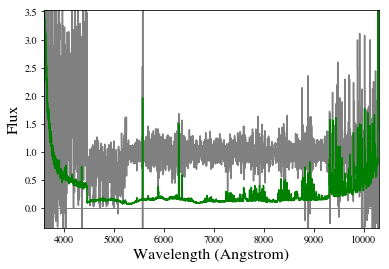

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0835+4619 and wvobs=8439.45 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 2 spectra totalling 0.00036 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/MODS_redux//./SDSSJ083712.69+363037.7_r_F.fits.gz
No spectrum found for APOJ0837+3630 and wvobs=7931.52 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
No spectrum found for APOJ0837+3837 and wvobs=8563.61 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/l

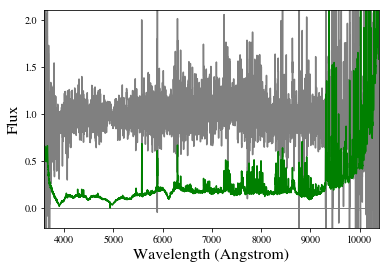

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0843+4426 and wvobs=7772.33 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0845+4641 and wvobs=7352.94 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0846+4539 and wvobs=7675.98 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
St

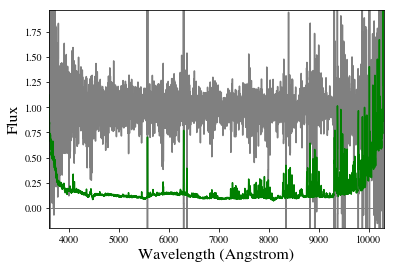

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: spec-7513-56780-0531.fits.gz
No spectrum found for SDSSJ0851+4843 and wvobs=8473.97 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0851+5229 and wvobs=8315.79 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7327-56715-0824.fits.gz for SDSSJ0852+4714
S/N in rest frame: 7.74571923105 1 / Angstrom


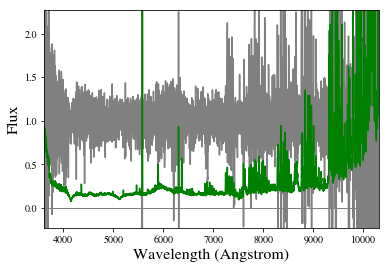

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0853+4506 and wvobs=7681.89 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRSPEC_redux//./SDSSJ085357.49-001106.2.fits
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ085357.49-001106.1_F.fits.gz for BOSSJ0853-0011
S/N in rest frame: 27.284759895 1 / Angstrom


/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:957: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


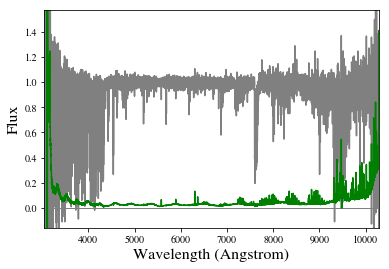

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0856+5514 and wvobs=7334.34 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-4608-55973-0634.fits.gz for SDSSJ0857+3901
S/N in rest frame: 11.950146504 1 / Angstrom


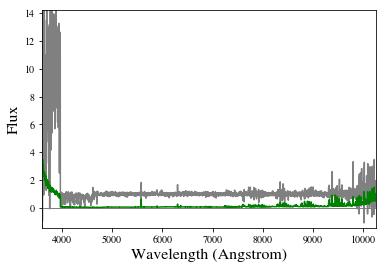

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: spec-7516-56782-0636.fits.gz
No spectrum found for SDSSJ0902+4654 and wvobs=7584.44 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using spSpec-51929-0470-486.fit.gz for SDSSJ0904+0042
S/N in rest frame: 5.97561776381 1 / Angstrom


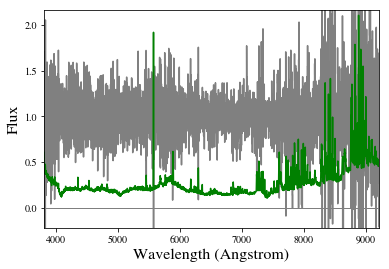

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-5299-55927-0744.fits.gz for SDSSJ0906+1001
S/N in rest frame: 6.69083333487 1 / Angstrom


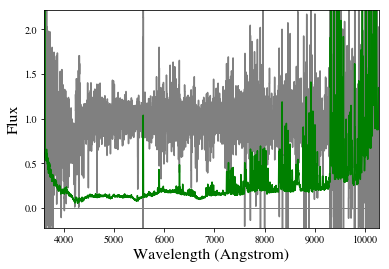

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 2 spectra totalling 0.00072 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ091046.69+041448.4.fits
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ091046.69+041448.4_F.fits.gz for APOJ0910+0414
S/N in rest frame: 36.9129997037 1 / Angstrom


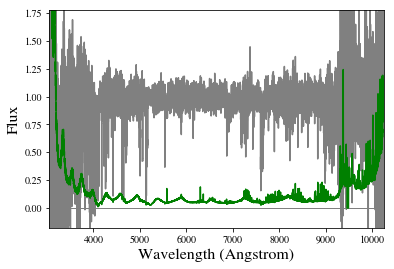

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0912+4139 and wvobs=7763.77 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-5809-56353-0052.fits.gz for SDSSJ0912+3056
S/N in rest frame: 34.6639685292 1 / Angstrom


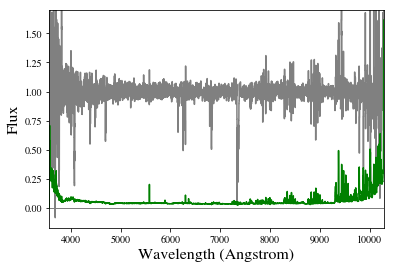

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ091338.97-010704.6_F.fits.gz for BOSSJ0913-0107
S/N in rest frame: 50.8167596286 1 / Angstrom


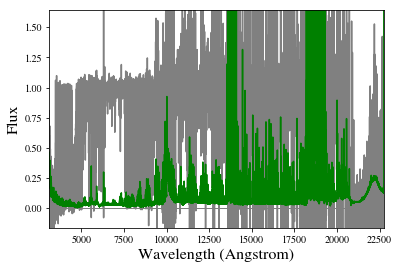

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for BOSSJ0914+0109 and wvobs=8781.74 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0915+4640 and wvobs=7674.45 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0915+0119 and wvobs=8306.89 Angstrom!
Databa

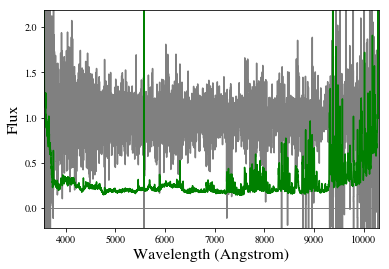

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
No spectrum found for APOJ0924+3929 and wvobs=8071.51 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for BOSSJ0925+3725 and wvobs=8585.88 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0929+4841 and wvobs=7645.94 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1

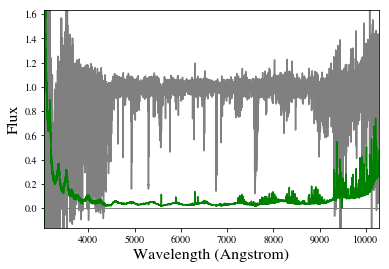

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-5716-56684-0357.fits.gz for SDSSJ0933+5920
S/N in rest frame: 7.96016855217 1 / Angstrom


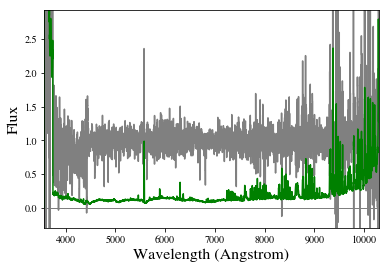

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for BOSSJ0936-0058 and wvobs=8975.76 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
No spectrum found for APOJ0938+5317 and wvobs=8577.1 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using spec-5740-55998-0380.fits.gz for SDSSJ0939+4820
S/N in rest frame: 7.96339899655 1 / Angstrom


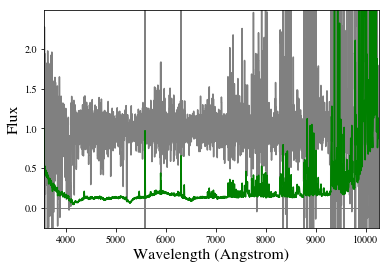

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7448-56739-0067.fits.gz for SDSSJ0939+5051
S/N in rest frame: 11.5595083023 1 / Angstrom


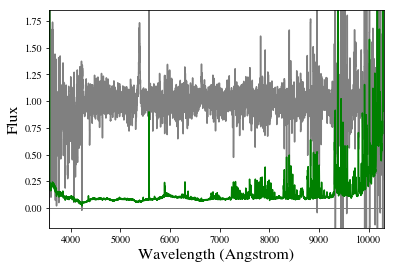

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-5788-56255-0380.fits.gz for SDSSJ0941+2308
S/N in rest frame: 7.32278821099 1 / Angstrom


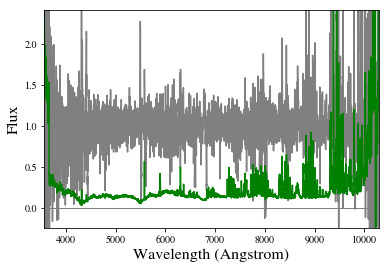

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0947+5043 and wvobs=7875.53 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0949+4659 and wvobs=7607.14 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
SDSSJ0951+4932 does not survive atmosphere cut
SDSSJ0951+4932 does not survive atmosphere cut
No spectrum found for SDSSJ0951+4932 and wvobs=7664.09 Angstrom!
Database is QPQ
Cr

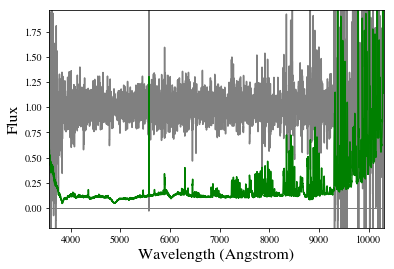

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0959+4704 and wvobs=7926.94 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: spec-6663-56338-0418.fits.gz
No spectrum found for SDSSJ1000+4654 and wvobs=8320.71 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1000+0337 and wvobs=7551.73 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Da

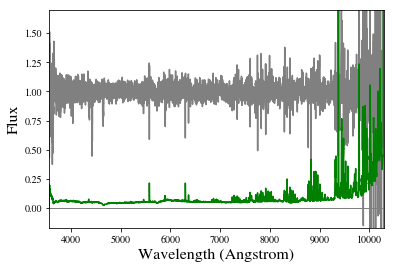

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_6_0/SDSSJ100627.10+480429.9.fits for BOSSJ1006+4804
S/N in rest frame: 6.97791925698 1 / Angstrom


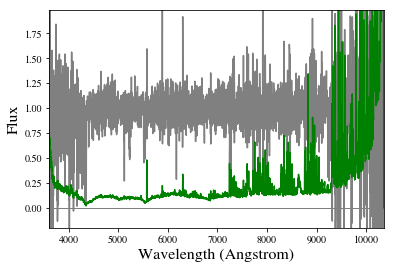

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
SDSSJ1009+0236 does not survive atmosphere cut
No spectrum found for SDSSJ1009+0236 and wvobs=7650.52 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_6_0/SDSSJ100940.58+250053.9.fits for APOJ1009+2500
S/N in rest frame: 7.75206107623 1 / Angstrom


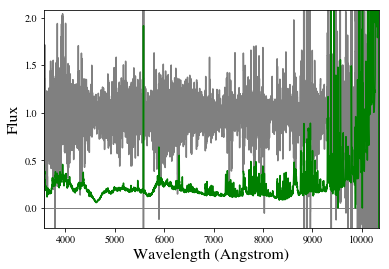

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-4566-55630-0078.fits.gz for BOSSJ1010+4037
S/N in rest frame: 13.8614885271 1 / Angstrom


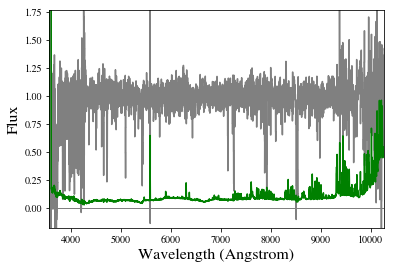

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1013+0330 and wvobs=8221.52 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7081-56684-0951.fits.gz for SDSSJ1017+6226
S/N in rest frame: 10.0678875306 1 / Angstrom


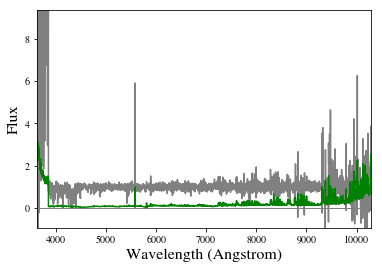

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ101946.99+494848.6.fits.gz for BOSSJ1019+4948
S/N in rest frame: 15.1178785269 1 / Angstrom


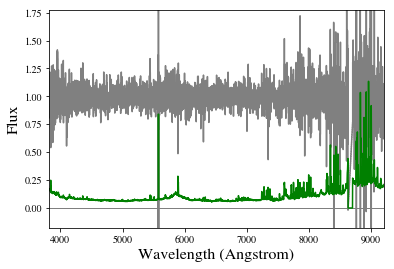

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1020+6119 and wvobs=7804.23 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1022+4911 and wvobs=8321.25 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1028+2400 and wvobs=8028.12 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
St

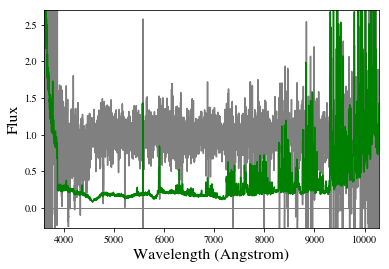

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6702-56381-0508.fits.gz for SDSSJ1036+5012
S/N in rest frame: 8.2823663642 1 / Angstrom


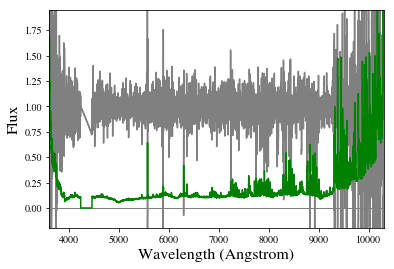

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ103900.01+502652.8_r600_F.fits.gz
No spectrum found for BOSSJ1039+5026 and wvobs=11556 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6657-56366-0302.fits.gz for SDSSJ1039+4547
S/N in rest frame: 11.7789396242 1 / Angstrom


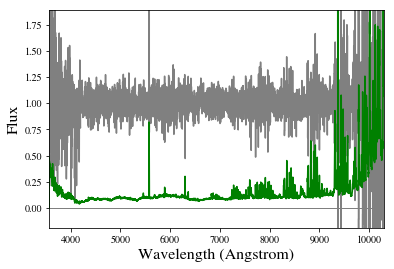

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
No spectrum found for APOJ1041+1957 and wvobs=7963.22 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1042+6459 and wvobs=8354.36 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1044+3139 and wvobs=7567.42 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Sta

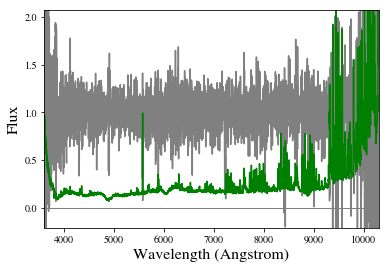

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7094-56660-0184.fits.gz for SDSSJ1052+5553
S/N in rest frame: 6.31329793622 1 / Angstrom


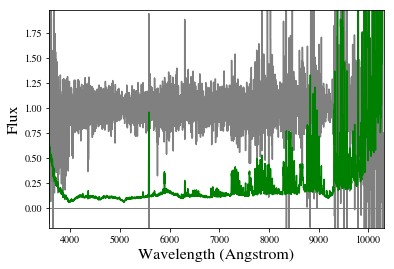

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7105-56740-0330.fits.gz for SDSSJ1052+6418
S/N in rest frame: 14.7807432352 1 / Angstrom


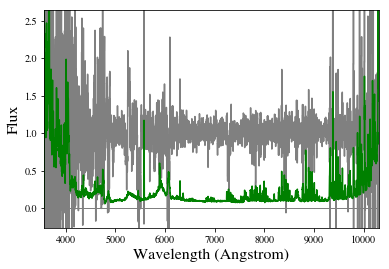

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1111+4642 and wvobs=8166.61 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1113+3305 and wvobs=8085.13 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1118+4025 and wvobs=8181.4 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Sta

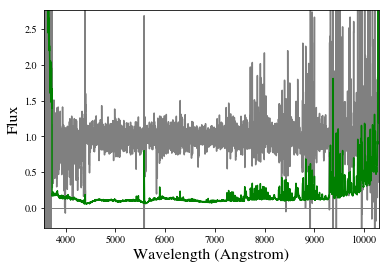

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 3 spectra totalling 0.00612 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ114436.65+095904.9_spl_F.fits.gz
No spectrum found for BOSSJ1144+0959 and wvobs=11110.9 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6645-56398-0777.fits.gz for SDSSJ1144+4541
S/N in rest frame: 21.3513241098 1 / Angstrom


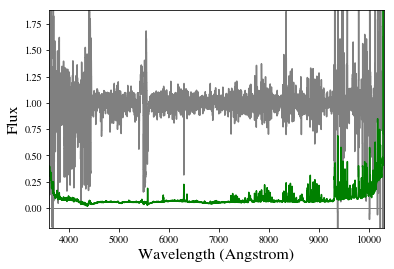

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ114546.22+032251.9_F.fits.gz for BOSSJ1145+0322
S/N in rest frame: 64.5807281572 1 / Angstrom


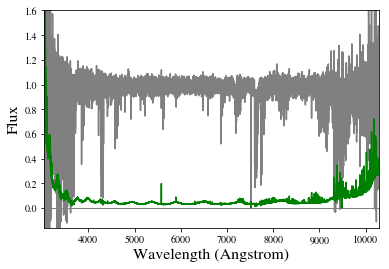

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: spec-7401-56808-0166.fits.gz
No spectrum found for SDSSJ1148+4507 and wvobs=7599.43 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using spec-5383-56013-0218.fits.gz for SDSSJ1152+1507
S/N in rest frame: 15.541643233 1 / Angstrom


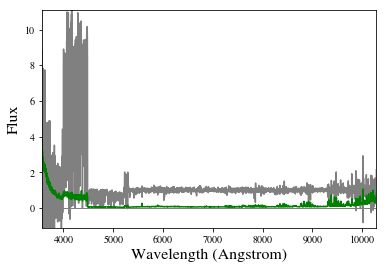

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using spSpec-53080-1446-168.fit.gz for SDSSJ1154+4712
S/N in rest frame: 15.3575671597 1 / Angstrom


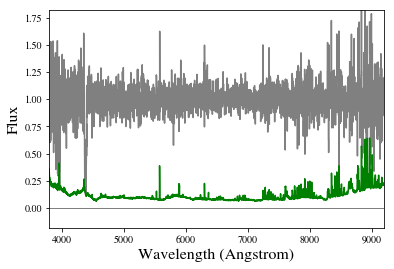

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6407-56311-0671.fits.gz for SDSSJ1155+2132
S/N in rest frame: 13.2170878917 1 / Angstrom


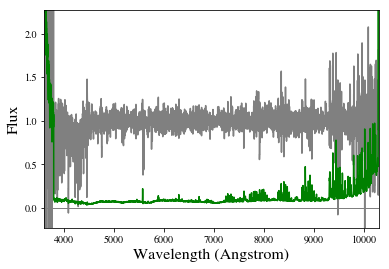

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6644-56384-0308.fits.gz for SDSSJ1155+4634
S/N in rest frame: 6.44618023862 1 / Angstrom


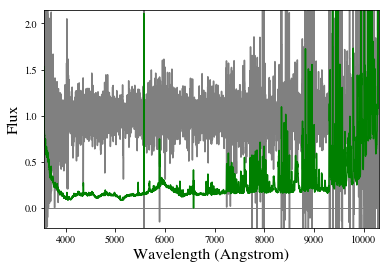

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-4697-55660-0326.fits.gz for SDSSJ1155+3934
S/N in rest frame: 11.5508606799 1 / Angstrom


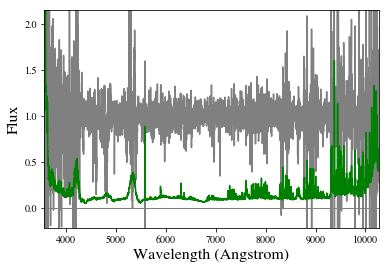

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-5389-55953-0264.fits.gz for SDSSJ1202+0747
S/N in rest frame: 9.52842598291 1 / Angstrom


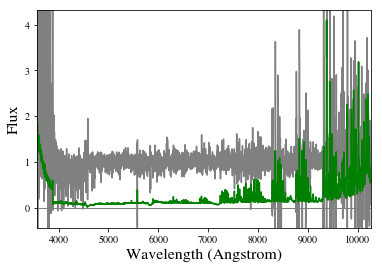

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00144 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 2 spectra totalling 0.0064 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ120416.69+022111.0_b1200_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz
Using conti=1 for HIRES
No continuum: J120416+022111_f.fits
Using conti=1 for HIRES
No continuum: J120416+022111_f.fits
Using conti=1 for HIRES
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ120416.69+022111.0_F.fits.gz for BOSSJ1204+0221
S/N in rest frame: 17.0920062125 1 / Angstrom


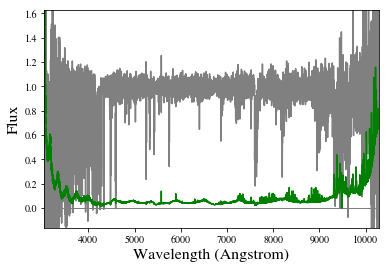

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ120857.16+073727.3_F.fits.gz for APOJ1208+0737
S/N in rest frame: 15.4230417749 1 / Angstrom


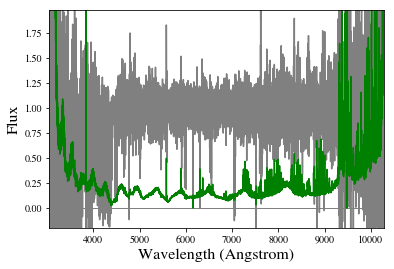

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-4612-55590-0382.fits.gz for SDSSJ1212+3240
S/N in rest frame: 7.36603896534 1 / Angstrom


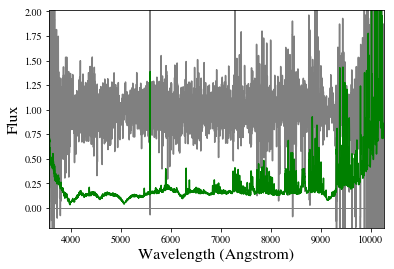

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6640-56385-0544.fits.gz for SDSSJ1213+4719
S/N in rest frame: 9.00319810937 1 / Angstrom


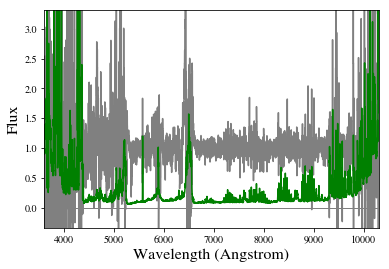

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ121558.82+571555.6.fits
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ121558.80+571555.4.fits.gz for BOSSJ1215+5715
S/N in rest frame: 21.3092026329 1 / Angstrom


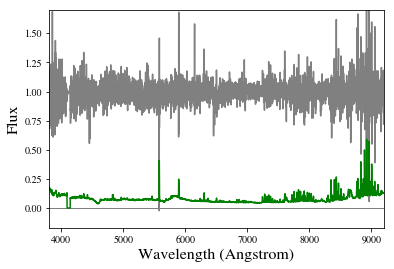

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-5392-56010-0997.fits.gz for SDSSJ1216+1527
S/N in rest frame: 17.373763447 1 / Angstrom


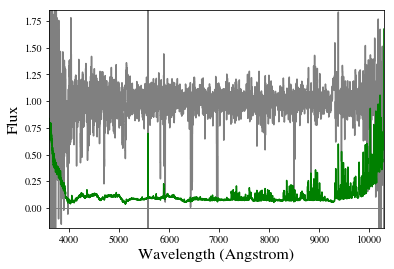

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1217+0112 and wvobs=8071.82 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1225+5709 and wvobs=8096.34 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: spec-7422-56799-0462.fits.gz
No spectrum found for SDSSJ1226+4538 and wvobs=8119.95 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Da

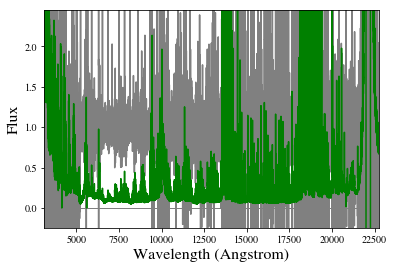

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: spec-7422-56799-0978.fits.gz
No spectrum found for SDSSJ1238+4605 and wvobs=7724.97 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1246+2345 and wvobs=8371.4 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-4703-55617-0350.fits.gz for SDSSJ1248+4058
S/N in rest frame: 13.3056162877 1 / Angstrom


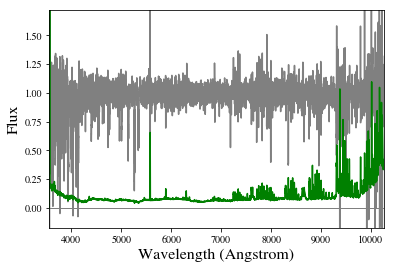

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
12h49m48.094s +06d07m09.2248s does not have a spectrum.
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: spec-7416-56810-0860.fits.gz
No spectrum found for SDSSJ1253+4751 and wvobs=7928.81 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ130125.67+475930.8.fits.gz for SDSSJ1301+4759
S/N in rest frame: 6.41940888063 1 / Angstrom


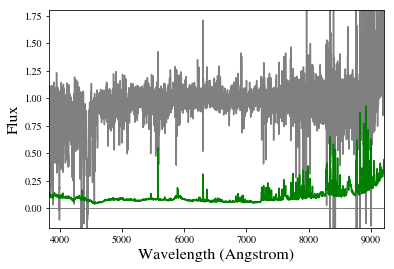

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
No spectrum found for APOJ1306+6158 and wvobs=8693.68 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7414-56748-0750.fits.gz for SDSSJ1307+4635
S/N in rest frame: 8.56680508464 1 / Angstrom


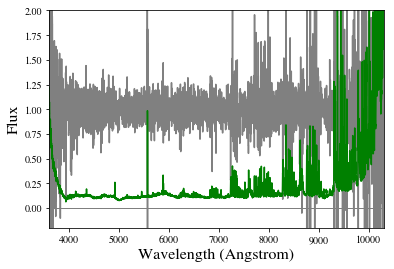

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1313+4546 and wvobs=7516.15 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1318+3020 and wvobs=7610.82 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6828-56430-0134.fits.gz for SDSSJ1325+5409
S/N in rest frame: 9.46760172019 1 / Angstrom


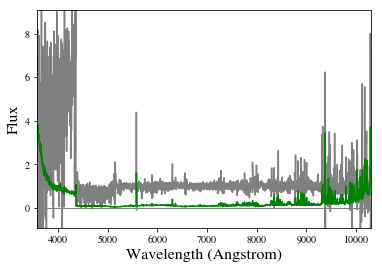

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
No spectrum found for APOJ1327+3423 and wvobs=7409.21 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: spec-7407-56772-0606.fits.gz
No spectrum found for SDSSJ1328+4712 and wvobs=7627.81 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1329+4320 and wvobs=7274.28 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Dat

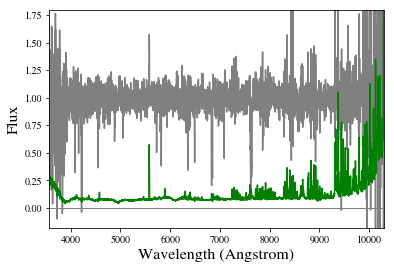

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using spec-6748-56371-0136.fits.gz for SDSSJ1339+4627
S/N in rest frame: 14.5834323464 1 / Angstrom


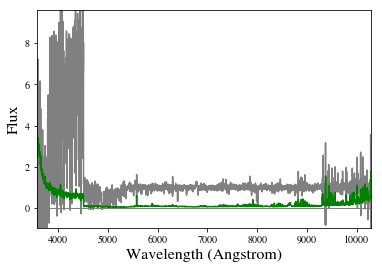

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1342+4713 and wvobs=7473.17 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1346+1952 and wvobs=8584.1 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1348+4642 and wvobs=7915.75 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Sta

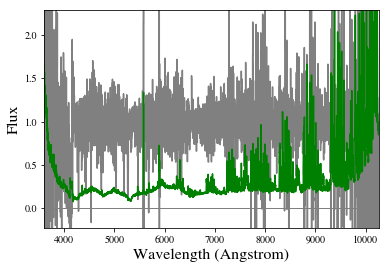

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6009-56313-0350.fits.gz for APOJ1358+2737
S/N in rest frame: 8.10201574363 1 / Angstrom


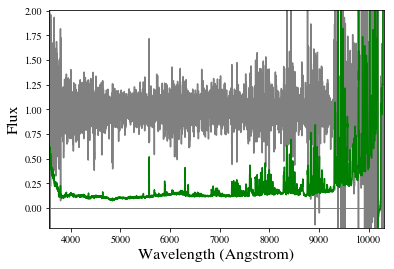

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ140209.52+470117.8.fits
No spectrum found for BOSSJ1402+4701 and wvobs=8154.51 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1403+3734 and wvobs=7413.29 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Create

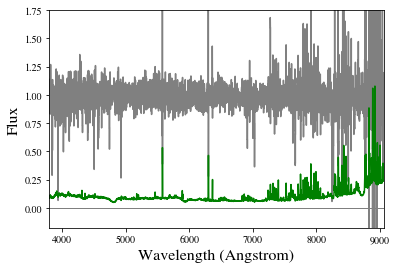

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1409+5405 and wvobs=7333.02 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using spec-6011-56103-0100.fits.gz for SDSSJ1413+2715
S/N in rest frame: 28.9543725726 1 / Angstrom


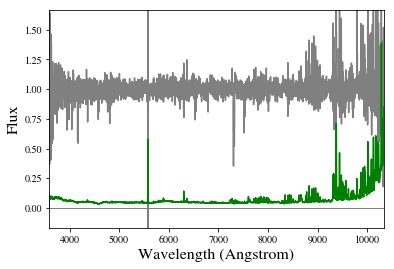

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1417+4507 and wvobs=7490 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1417+0703 and wvobs=7285.22 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1418+5152 and wvobs=8072.77 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Stage

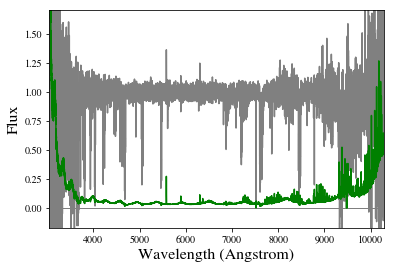

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1422+4652 and wvobs=7684.28 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 3 spectra totalling 0.00612 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ142758.74-012136.2_b1200_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_r_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_spl_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//

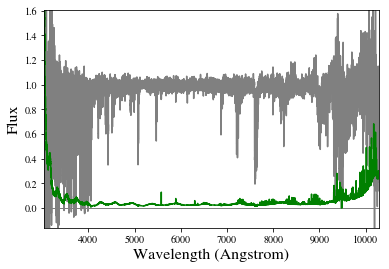

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_6_0/SDSSJ143109.22+572726.4.fits for APOJ1431+5727
S/N in rest frame: 7.6056370584 1 / Angstrom


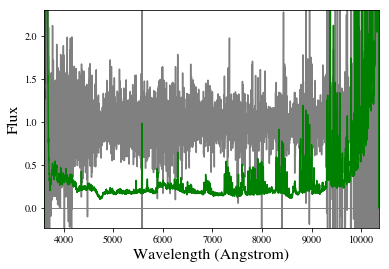

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-5467-55973-0438.fits.gz for SDSSJ1433+0827
S/N in rest frame: 8.38924746891 1 / Angstrom


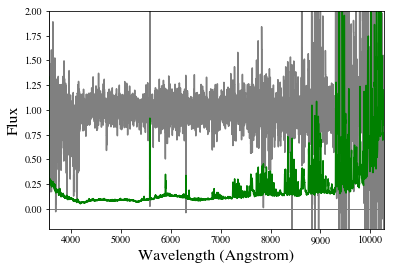

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 3 spectra totalling 0.0003 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-4859-55684-0528.fits.gz for BOSSJ1433+0641
S/N in rest frame: 13.272247168 1 / Angstrom


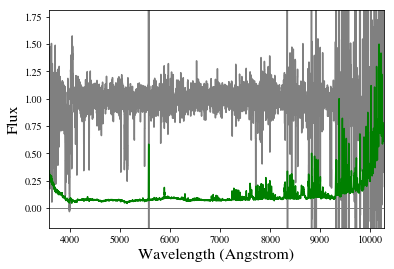

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1436+3134 and wvobs=8046.21 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6718-56398-0974.fits.gz for SDSSJ1442+5303
S/N in rest frame: 9.91558784301 1 / Angstrom


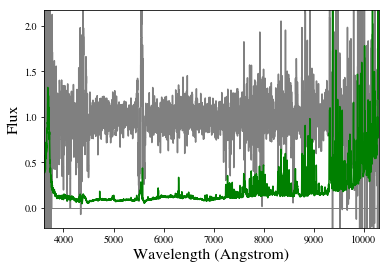

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ144231.91+013734.8.fits for BOSSJ1442+0137
S/N in rest frame: 19.7373415307 1 / Angstrom


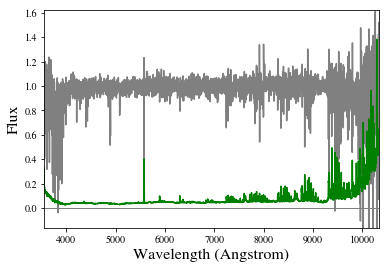

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
No spectrum found for APOJ1444+3113 and wvobs=7649.35 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 2 spectra totalling 0.0002 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ150812.80+363530.4.fits for BOSSJ1508+3635
S/N in rest frame: 7.6450906313 1 / Angstrom


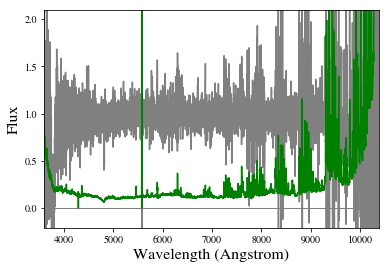

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1516+2225 and wvobs=8367.47 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ153329.17+142537.8.fits for BOSSJ1533+1425
S/N in rest frame: 13.971894468 1 / Angstrom


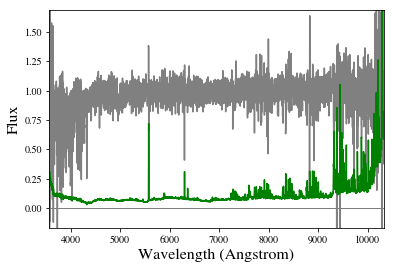

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-3949-55650-0016.fits.gz for SDSSJ1534+2153
S/N in rest frame: 9.52817336818 1 / Angstrom


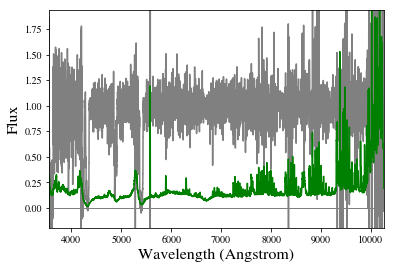

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-4723-56033-0012.fits.gz for SDSSJ1539+3146
S/N in rest frame: 6.62111883606 1 / Angstrom


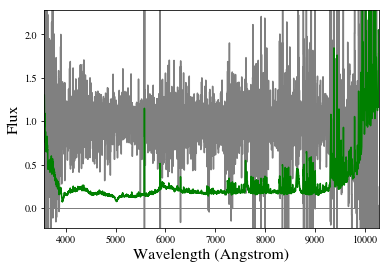

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1541+4919 and wvobs=8517.87 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1543+4445 and wvobs=7981.35 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1544+5027 and wvobs=7292.51 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
St

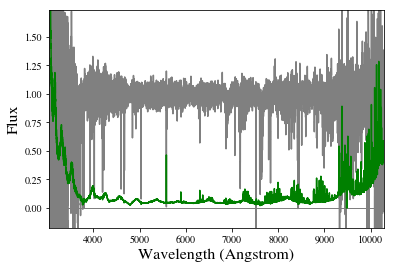

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-4900-55739-0026.fits.gz for SDSSJ1554+1244
S/N in rest frame: 11.1181733801 1 / Angstrom


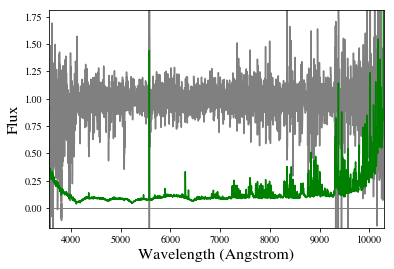

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1557+2929 and wvobs=8284.4 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
No spectrum found for APOJ1559+4943 and wvobs=8001.74 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6716-56401-0032.fits.gz for APOJ1605+5113
S/N in rest frame: 25.8174840277 1 / Angstrom


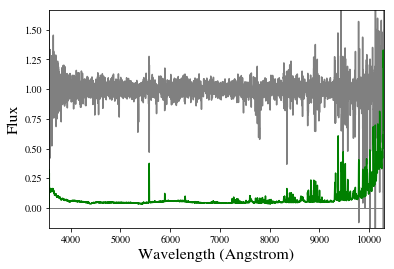

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1619+1926 and wvobs=7779.76 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
No spectrum found for APOJ1627+4606 and wvobs=13464.2 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1631+4333 and wvobs=8439.95 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Stag

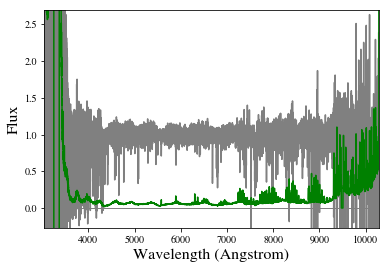

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-5965-56190-0056.fits.gz for SDSSJ2148+2631
S/N in rest frame: 7.57178320643 1 / Angstrom


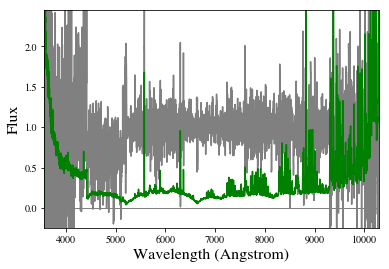

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ2149+0113 and wvobs=8035.84 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 2 spectra totalling 0.0002 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ220248.31+123656.3.fits
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_7_0/SDSSJ220248.31+123656.3.fits for BOSSJ2202+1236
S/N in rest frame: 8.60117319252 1 / Angstrom


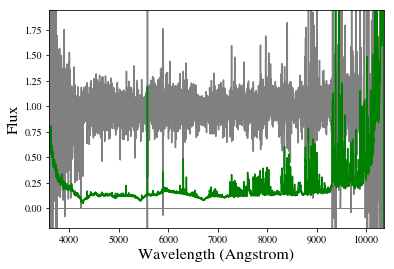

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
SDSSJ2255-0001 does not survive atmosphere cut
No spectrum found for SDSSJ2255-0001 and wvobs=7634.6 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ233845.45-000331.8_F.fits.gz for SDSSJ2338-0003
S/N in rest frame: 51.94417862 1 / Angstrom


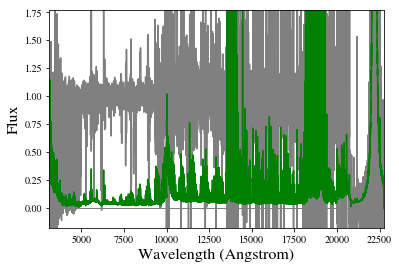

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ2351+2737 and wvobs=7626.41 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6500-56541-0076.fits.gz for SDSSJ2355+3201
S/N in rest frame: 9.10102640382 1 / Angstrom


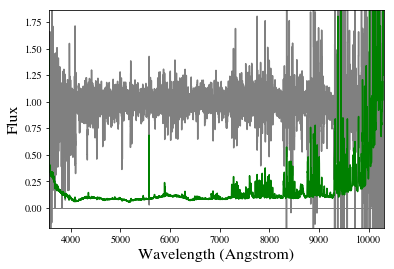

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7145-56567-0311.fits.gz for SDSSJ2358+3425
S/N in rest frame: 5.795420497 1 / Angstrom


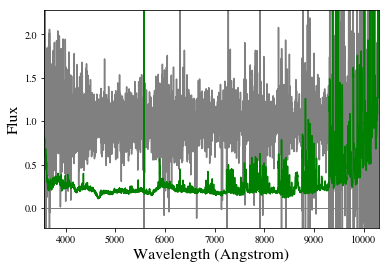

In [ ]:
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999),
                               vsig_cut=400*u.km/u.s,plot_indiv=True)
fin_velo, stck_img, stck_msk, all_dict = stack_tup0

In [ ]:
reload(qpq9k)
stack_tup = qpq9k.msk_stcks(stack_tup0,2796.354*u.AA,write=True)
fin_velo, stck_img, stck_mskN, all_dict = stack_tup

In [4]:
print(np.sum(stck_mskN,0))
sv_zfg = []
sv_Rperp = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if np.sum(stck_mskN[ii,:]) == 0:
        continue
    sv_zfg.append(idict['qpq']['Z_FG'])
    sv_Rperp.append(idict['qpq']['R_PHYS'])
np.median(sv_zfg),np.median(sv_Rperp)

[ 86.  85.  85.  85.  85.  85.  85.  85.  85.  85.  85.  85.  86.  86.  86.
  86.  85.  85.  85.  85.  85.  85.  85.  85.  85.  85.  86.  86.  86.  86.
  86.  86.  86.  86.  86.  86.  86.  86.  86.  86.  86.  86.  86.  86.  86.
  86.  86.  86.  86.  86.  86.  86.  86.  86.  86.  86.  86.  86.  86.  86.
  86.]


(1.867323580323125, 184.14362495424137)

In [10]:
str = 'Stacks/CII_sample.fits'
str[7:10]

u'CII'

## Stack and plot

### Mean

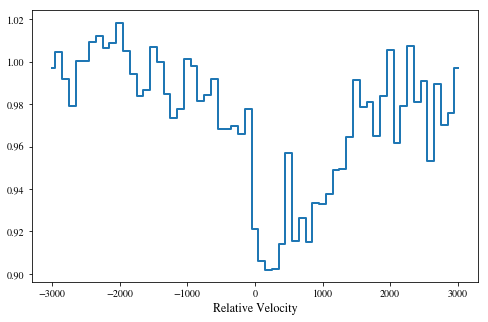

In [5]:
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

### Median

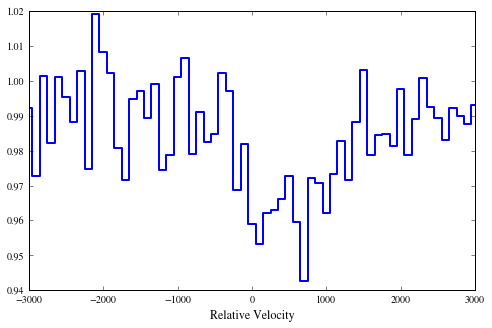

In [6]:
fin_velo, fin_flx_med, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx_med, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

### Write

In [7]:
from linetools.spectra.xspectrum1d import XSpectrum1D
outfil = 'Output/QPQ9_zIRMgII_2796_mean.fits'
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
fin_wave = fin_velo.to(u.AA,equivalencies=relativistic_equiv)
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx)))
xspec1d.write_to_fits(outfil,clobber=True)
outfil = 'Output/QPQ9_zIRMgII_2796_med.fits'
xspec1d = XSpectrum1D.from_tuple((fin_wave,u.Quantity(fin_flx_med)))
xspec1d.write_to_fits(outfil,clobber=True)

Wrote spectrum to Output/QPQ9_zIRMgII_2796_mean.fits
Wrote spectrum to Output/QPQ9_zIRMgII_2796_med.fits


## Bootstrap

In [9]:
#Mean
reload(qpq9b)
qpq9b.boot_trans(wrest=2796.354*u.AA,outfil='../Bootstrap/Output/IRMgII_2796_mean.fits',stack_tup0=stack_tup)

Equivalent width skewness: Mean=0.774655, Median=0.759286, std=0.182449 for Ntrials=10000
Centroid: Mean = 242.032, scatter=124.284
Dispersion and scatter of it:  346.222634565 200.313277803
max and min centroid:  1000.73883867 -421.016715385
Wrote ../Bootstrap/Output/IRMgII_2796_mean.fits


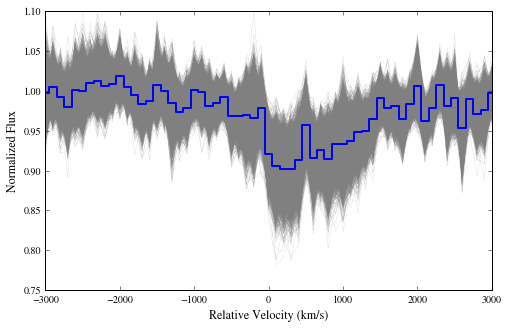

In [10]:
# plot 
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('../Bootstrap/Output/IRMgII_2796_mean.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity (km/s)', size=12.)
plt.ylabel('Normalized Flux', size=12.)
plt.show()

0.016

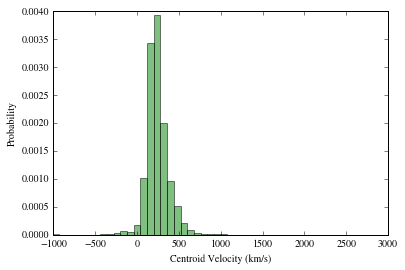

In [11]:
# Plot centroids
tau_cen = hdulist[3].data
n, bins, patches = plt.hist(tau_cen, 50, normed=1, facecolor='green', alpha=0.5, range=(-1000,3000))
plt.xlabel('Centroid Velocity (km/s)')
plt.ylabel('Probability')
len(np.where(tau_cen < 0)[0])/len(tau_cen)

In [12]:
#Median
reload(qpq9b)
qpq9b.boot_trans(wrest=2796.354*u.AA,outfil='../Bootstrap/Output/IRMgII_2796_med.fits',stack_tup0=stack_tup,median=True)

Equivalent width skewness: Mean=0.98116, Median=0.859112, std=2.74954 for Ntrials=10000
Centroid: Mean = 193.208, scatter=200.847
Dispersion and scatter of it:  318.891886476 215.262002964
max and min centroid:  2849.58557265 -710.435474301
Wrote ../Bootstrap/Output/IRMgII_2796_med.fits


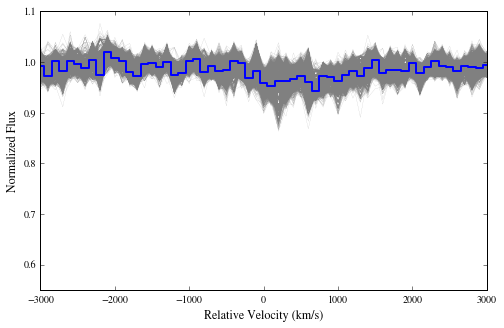

In [13]:
# plot trials
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('../Bootstrap/Output/IRMgII_2796_med.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.axis([-3000,3000,0.55,1.1])
plt.xlabel('Relative Velocity (km/s)', size=12.)
plt.ylabel('Normalized Flux', size=12.)
plt.show()

# [OIII] only

In [14]:
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,vsig_cut=70*u.km/u.s,S2N_cut=5.5/u.AA,
                               zfg_mnx=(1.6,9999),plot_indiv=False)
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,dd in enumerate(all_dict):
    if dd is None:
        continue
    if 'J0822+1319' in dd['qpq']['NAME']: #BAL
        idx_mask.append(ii) 
for idx in idx_mask:
    stck_mskN[idx,:] = 0.

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for BOSSJ0057-0001 and wvobs=8839.49 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ023946.44-010644.2_F.fits.gz
No continuum: /u/xavier/Dr

In [19]:
np.sum(stck_mskN,0)
sv_zfg = []
sv_Rperp = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if np.sum(stck_mskN[ii,:]) == 0:
        continue
    sv_zfg.append(dd['qpq']['Z_FG'])
    sv_Rperp.append(dd['qpq']['R_PHYS'])
np.median(sv_zfg),np.median(sv_Rperp)

(2.2737742369614917, 111.64153254054823)

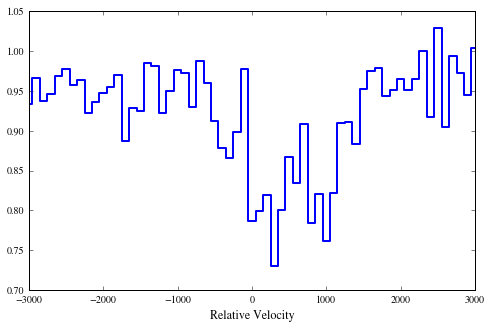

In [16]:
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

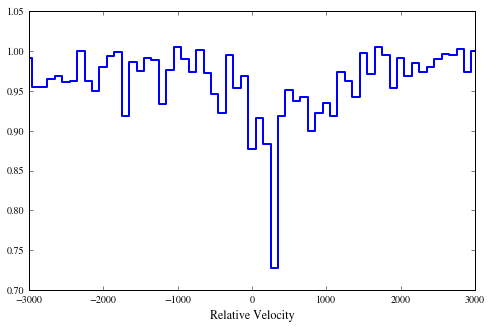

In [17]:
fin_velo, fin_flx_med, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx_med, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

In [18]:
from linetools.spectra.xspectrum1d import XSpectrum1D
outfil = 'Output/QPQ9_zOIII_2796_mean.fits'
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
fin_wave = fin_velo.to(u.AA,equivalencies=relativistic_equiv)
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx)))
xspec1d.write_to_fits(outfil,clobber=True)
outfil = 'Output/QPQ9_zOIII_2796_med.fits'
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx_med)))
xspec1d.write_to_fits(outfil,clobber=True)

Wrote spectrum to Output/QPQ9_zOIII_2796_mean.fits
Wrote spectrum to Output/QPQ9_zOIII_2796_med.fits


## Bootstrap

In [20]:
#Mean 
reload(qpq9b)
qpq9b.boot_trans(wrest=2796.354*u.AA,outfil='../Bootstrap/Output/OIII_2796_mean.fits',stack_tup0=stack_tup)

Equivalent width skewness: Mean=0.845146, Median=0.797867, std=0.890658 for Ntrials=10000
Centroid: Mean = 204.349, scatter=119.177
Dispersion and scatter of it:  259.087838379 129.439515305
max and min centroid:  1189.87466198 -611.761948982
Wrote ../Bootstrap/Output/OIII_2796_mean.fits


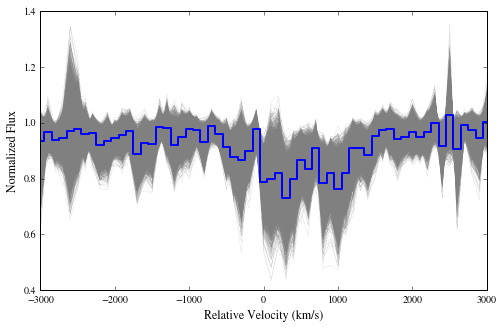

In [21]:
# plot 
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('../Bootstrap/Output/OIII_2796_mean.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity (km/s)', size=12.)
plt.ylabel('Normalized Flux', size=12.)
plt.show()

0.0453

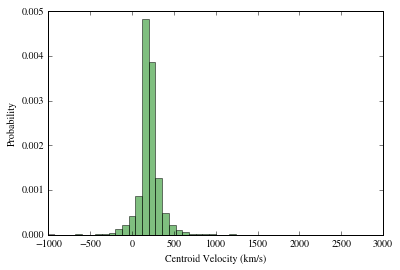

In [22]:
# Plot centroids
tau_cen = hdulist[3].data
n, bins, patches = plt.hist(tau_cen, 50, normed=1, facecolor='green', alpha=0.5, range =(-1000,3000))
plt.xlabel('Centroid Velocity (km/s)')
plt.ylabel('Probability')
len(np.where(tau_cen < 0)[0])/len(tau_cen)

In [23]:
#Median
reload(qpq9b)
qpq9b.boot_trans(wrest=2796.354*u.AA,outfil='../Bootstrap/Output/OIII_2796_med.fits',stack_tup0=stack_tup,median=True)

Equivalent width skewness: Mean=0.421761, Median=0.849257, std=54.9403 for Ntrials=10000
Centroid: Mean = 217.855, scatter=124.883
Dispersion and scatter of it:  195.026103391 114.020845137
max and min centroid:  1418.69691514 -629.633636984
Wrote ../Bootstrap/Output/OIII_2796_med.fits


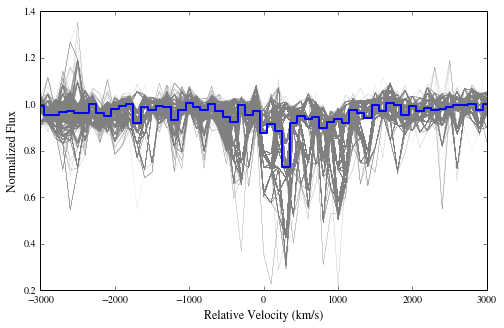

In [ ]:
# plot 
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('../Bootstrap/Output/OIII_2796_med.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx_med, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity (km/s)', size=12.)
plt.ylabel('Normalized Flux', size=12.)
plt.show()

# Plot individual spectra

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
No spectrum found for BOSSJ0034-1049 and wvobs=7938.22 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using spec-4223-55451-0508.fits.gz for SDSSJ0042+0032
S/N in rest frame: 9.9883765209 1 / Angstrom
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0047+3101 and wvobs=8306.88 Angstrom!
Database

/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:249: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:974: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__rtruediv__(other)



SDSSJ0409-0411 does not survive atmosphere cut
SDSSJ0409-0411 does not survive atmosphere cut
No spectrum found for SDSSJ0409-0411 and wvobs=7596.71 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0727+3929 and wvobs=8347.92 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
No spectrum found for BOSSJ0750+2724 and wvobs=7749.61 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra

/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:957: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


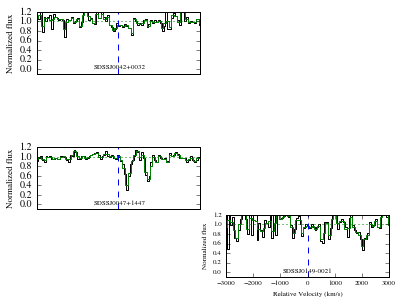

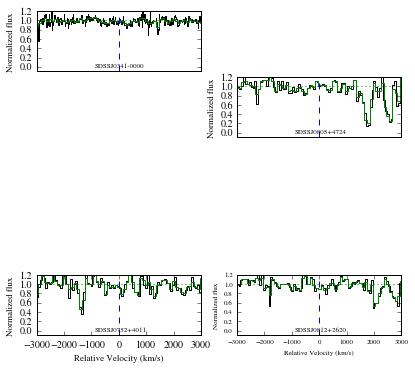

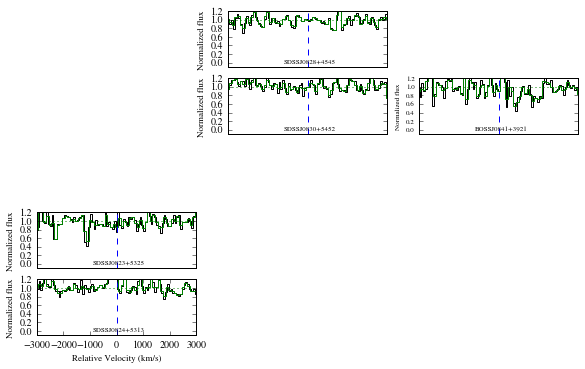

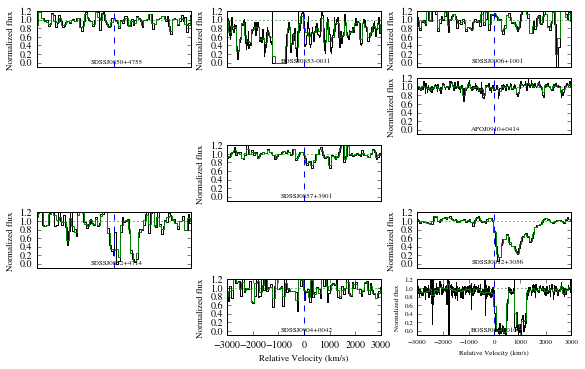

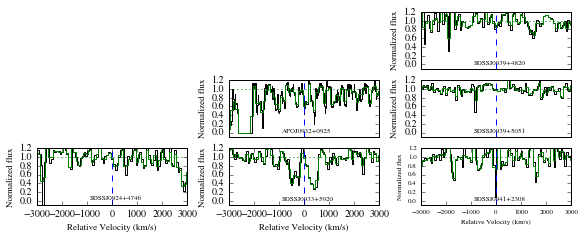

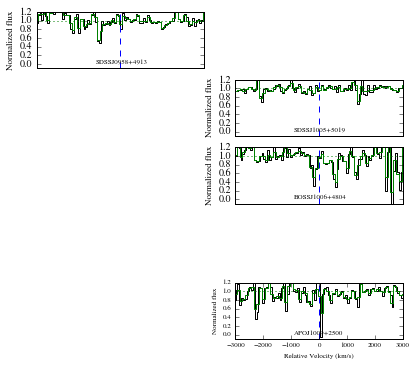

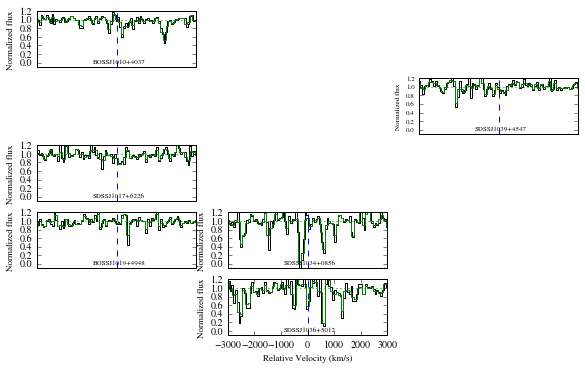

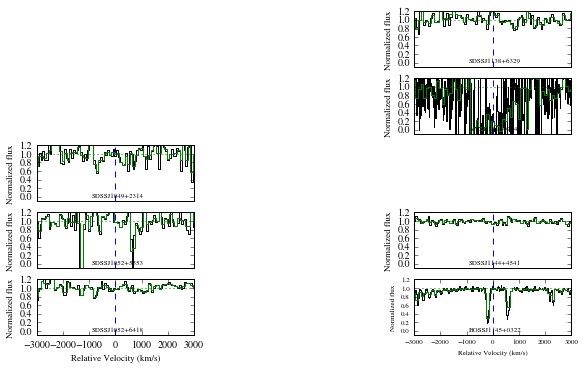

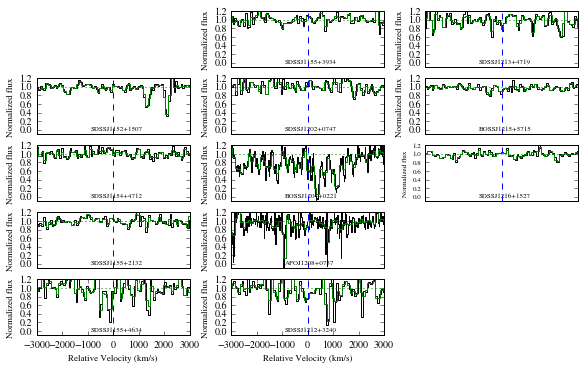

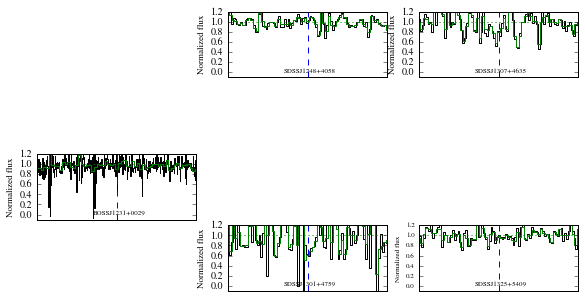

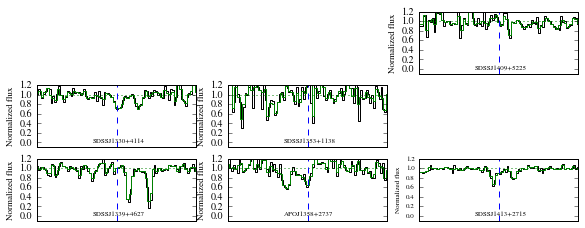

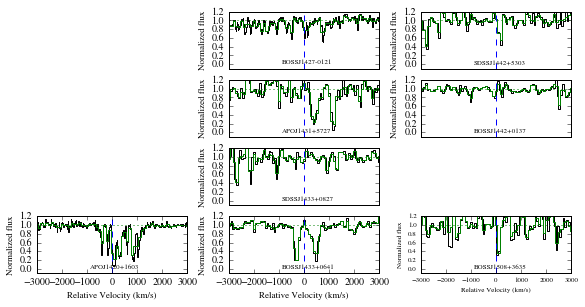

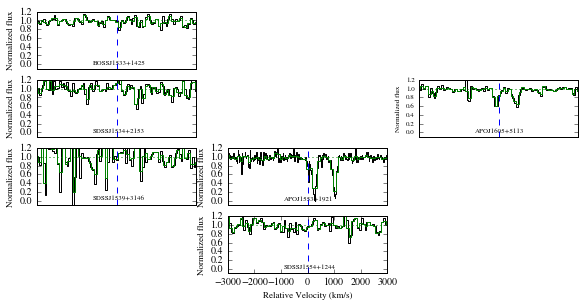

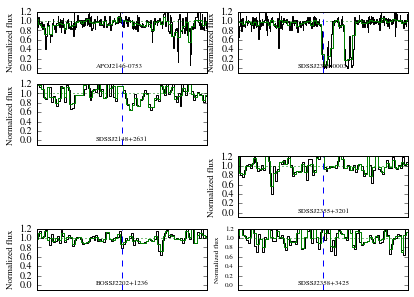

In [3]:
reload(qpq9k)
qpq9k.plt_qpq9(wrest=2796.354*u.AA,S2N_cut=5.5/u.AA,stack_fg=False,zfg_mnx=(1.6,9999))

# Split in two bins of g_UV

## MgII redshift stack

In [ ]:
# Load QPQ9 data structure
enigma_path = imp.find_module('enigma')[1]
QPQ9 = xxf.bintab_to_table(enigma_path+'/data/qpq/qpq9_final.fits')
c_QPQ9 = SkyCoord(QPQ9['FG_RA']*u.deg,QPQ9['FG_DEC']*u.deg)
# Find median g_UV
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_gUV = []
for idict in all_dict:
    if idict == None:
        continue
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    sv_gUV.append(QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0])
med_gUV = np.median(sv_gUV)

In [ ]:
# Mask spectra of gUV below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    gUV = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0]
    if gUV <= med_gUV:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

In [ ]:
# Mask spectra of gUV above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    gUV = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0]
    if gUV >= med_gUV:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

## [OIII] redshift stack

In [ ]:
# Find median g_UV
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,vsig_cut=50*u.km/u.s,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_gUV = []
for idict in all_dict:
    if idict == None:
        continue
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    sv_gUV.append(QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0])
med_gUV = np.median(sv_gUV)

In [ ]:
# Mask spectra of gUV below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    gUV = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0]
    if gUV <= med_gUV:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

In [ ]:
# Mask spectra of gUV above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    gUV = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0]
    if gUV >= med_gUV:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

# Split in two bins of R_phys

## MgII redshift stack 

In [ ]:
# Find median R_phys
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_Rphys = []
for idict in all_dict:
    if idict == None:
        continue
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    sv_Rphys.append(QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0])
med_Rphys = np.median(sv_Rphys)

In [ ]:
# Mask spectra of R_phys below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if R_phys <= med_Rphys:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

In [ ]:
# Mask spectra of R_phys above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if R_phys >= med_Rphys:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

## [OIII] redshift stack

In [ ]:
# Find median R_phys
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,vsig_cut=50*u.km/u.s,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_Rphys = []
for idict in all_dict:
    if idict == None:
        continue
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    sv_Rphys.append(QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0])
med_Rphys = np.median(sv_Rphys)

In [ ]:
# Mask spectra of R_phys below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if R_phys <= med_Rphys:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

In [ ]:
# Mask spectra of R_phys above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if R_phys >= med_Rphys:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

# Split in two bins of velocity separations 

## MgII redshift stack 

In [ ]:
# Find median velocity separation 
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_dv = []
for idict in all_dict:
    if idict == None:
        continue
    sv_dv.append(ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value)
med_dv = np.median(sv_dv)

In [ ]:
# Mask spectra of velocity separation below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
sv_z = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    dv = ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value
    if dv <= med_dv:
        idx_mask.append(ii)
        sv_z.append(idict['qpq']['Z_FG'])
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg of this stack =',np.median(sv_z))

In [ ]:
# Mask spectra of velocity separation above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
sv_z = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    dv = ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value
    if dv >= med_dv:
        idx_mask.append(ii)
        sv_z.append(idict['qpq']['Z_FG'])
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg of this stack =',np.median(sv_z))

## [OIII] redshift stack

In [ ]:
# Find median velocity separation 
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,vsig_cut=50*u.km/u.s,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_dv = []
for idict in all_dict:
    if idict == None:
        continue
    sv_dv.append(ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value)
print(sv_dv)
med_dv = np.median(sv_dv)

In [ ]:
# Mask spectra of velocity separation below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
sv_z = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    dv = ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value
    if dv <= med_dv:
        idx_mask.append(ii)
        sv_z.append(idict['qpq']['Z_FG'])
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg of this stack =',np.median(sv_z))

In [ ]:
# Mask spectra of velocity separation above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
sv_z = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    dv = ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value
    if dv >= med_dv:
        idx_mask.append(ii)
        sv_z.append(idict['qpq']['Z_FG'])
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg of this stack =',np.median(sv_z))